# Data import

In [2]:
from datasets import Dataset
import pandas as pd

data = pd.read_excel('./240721.xlsx')
data.head()

,Unnamed: 0,text,label,keywords,academic performance,death of a loved one,mental disorders,family-related issues,previous suicide attempts,other suicidal thoughts
0,0,Ex Wife Threatening SuicideRecently I left my ...,1,death,0,1,0,0,0,0
1,4,"I’m so lostHello, my name is Adam (16) and I’v...",1,"drug, depression, anxiety",0,0,1,0,0,0
2,6,[Trigger warning] Excuse for self inflicted bu...,1,father,0,1,0,0,0,0
3,9,My life is over at 20 years oldHello all. I am...,1,"relationship, depression, anxiety, bipolar, pa...",0,1,1,0,0,0
4,13,"death, continuedI posted here before and saw s...",1,death,0,1,0,0,0,0


In [3]:
data=data.dropna(how='any')
data.shape

(10184, 10)

In [4]:
data.drop(["Unnamed: 0", "keywords", "label"], axis=1, inplace=True)
data.head()

,text,academic performance,death of a loved one,mental disorders,family-related issues,previous suicide attempts,other suicidal thoughts
0,Ex Wife Threatening SuicideRecently I left my ...,0,1,0,0,0,0
1,"I’m so lostHello, my name is Adam (16) and I’v...",0,0,1,0,0,0
2,[Trigger warning] Excuse for self inflicted bu...,0,1,0,0,0,0
3,My life is over at 20 years oldHello all. I am...,0,1,1,0,0,0
4,"death, continuedI posted here before and saw s...",0,1,0,0,0,0


In [6]:
data.rename(columns={"academic performance": "academic", "death of a loved one": "death", "mental disorders": "mental", "family-related issues": "family", "previous suicide attempts": "second", "other suicidal thoughts": "other"}, inplace=True)
data.head()

,text,academic,death,mental,family,second,other
0,Ex Wife Threatening SuicideRecently I left my ...,0,1,0,0,0,0
1,"I’m so lostHello, my name is Adam (16) and I’v...",0,0,1,0,0,0
2,[Trigger warning] Excuse for self inflicted bu...,0,1,0,0,0,0
3,My life is over at 20 years oldHello all. I am...,0,1,1,0,0,0
4,"death, continuedI posted here before and saw s...",0,1,0,0,0,0


In [8]:
import numpy as np

label_columns = ["academic", "death", "mental", "family", "second", "other"]

def process_row(row):
    
    if 2 in row[label_columns].values:
        # Set the label with value 2 to 1 and others to 0
        for col in label_columns:
            row[col] = 1. if row[col] == 2 else row[col]
    elif 1 in row[label_columns].values:
        for col in label_columns:
            row[col] = 1. if row[col] == 1 else 0.
    else:
        for col in label_columns:
            row[col] = 0.
    return row
        

In [9]:
data = data.apply(process_row, axis=1)
data.head()

,text,academic,death,mental,family,second,other
0,Ex Wife Threatening SuicideRecently I left my ...,0.0,1.0,0.0,0.0,0.0,0.0
1,"I’m so lostHello, my name is Adam (16) and I’v...",0.0,0.0,1.0,0.0,0.0,0.0
2,[Trigger warning] Excuse for self inflicted bu...,0.0,1.0,0.0,0.0,0.0,0.0
3,My life is over at 20 years oldHello all. I am...,0.0,1.0,1.0,0.0,0.0,0.0
4,"death, continuedI posted here before and saw s...",0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
def collect_labels(row):
    label_columns = ['academic', 'death', 'mental', 'family', 'second', 'other']
    return [row[col] for col in label_columns]

# Add a new column with the list of active labels
data['labels'] = data.apply(collect_labels, axis=1)

# Drop the original label columns
data = data.drop(columns=['academic', 'death', 'mental', 'family', 'second', 'other'])


In [11]:
data.head(20)

,text,labels
0,Ex Wife Threatening SuicideRecently I left my ...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
1,"I’m so lostHello, my name is Adam (16) and I’v...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
2,[Trigger warning] Excuse for self inflicted bu...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
3,My life is over at 20 years oldHello all. I am...,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0]"
4,"death, continuedI posted here before and saw s...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
5,"Well, Im screwed. I locked myself in the schoo...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
6,yeaputting a knife to my wrist didn't give me ...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
7,"I am ending my life today, goodbye everyone.I ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
8,Me: I know I have a really toxic house and I d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
9,Posting Galadriel’s opening monologue every da...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


# Fine-tuning

Checkpoint values

- BERT: "bert-base-uncased"
- RoBERTa: "roberta-base"
- DistilBERT: "distilbert-base-uncased"
- ALBERT: "albert-base-v2"

In [12]:
# Set hyperparameters
test_size = 0.2
checkpoint = "bert-base-uncased"
num_train_epochs = 4
batch_size = 8
weight_decay=0.01
learning_rate = 2e-5

In [13]:
from datasets import DatasetDict
from datasets import Dataset

dataset = Dataset.from_pandas(data)

train_test_split = dataset.train_test_split(test_size=test_size)
train_data = train_test_split["train"]
test_valid = train_test_split["test"].train_test_split(test_size=0.5)
valid_data = test_valid["train"]
test_data = test_valid["test"]

train_test_split = DatasetDict({
    "train": train_data,
    "valid": valid_data,
    "test": test_data
})
train_data[0]

{'text': "Getting from one day to another is getting harder and harder.I feel so tired all the time. At night I don't want to sleep, and in the morning I don't want to get up. I don't know why I keep going back out into the world each day, I can't remember the last time it made me feel happy. \n\nAt this point the only reason I'm around is for my family, I don't have any personal desire to keep living. I guess I fear the pain of death as well.",
 'labels': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0]}

In [14]:
train_test_split.shape

{'train': (8147, 2), 'valid': (1018, 2), 'test': (1019, 2)}

In [15]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [16]:
def tokenize_function(da):
    tok = tokenizer(da["text"], truncation=True)
    tok["labels"] = da["labels"]
    return tok

In [17]:
tokenized_datasets = train_test_split.map(tokenize_function, batched=True)
tokenized_datasets

  0%|          | 0/9 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8147
    })
    valid: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1018
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1019
    })
})

In [18]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [19]:
%pip install -q evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [20]:
import evaluate
import numpy as np

clf_metrics = evaluate.combine(["accuracy", "f1", "precision", "recall"])

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = sigmoid(predictions)
    predictions = (predictions > 0.5).astype(int).reshape(-1)
    return clf_metrics.compute(predictions=predictions, references=labels.astype(int).reshape(-1))


In [21]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=6, problem_type = "multi_label_classification")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [22]:
from transformers import TrainingArguments

# training_args = TrainingArguments("train-test")

training_args = TrainingArguments(output_dir="train-test", 
                                  num_train_epochs=num_train_epochs,
                                  learning_rate=learning_rate,
                                  per_device_train_batch_size=batch_size, 
                                  per_device_eval_batch_size=batch_size, 
                                  warmup_steps=100, 
                                  weight_decay=weight_decay, 
                                  logging_dir="logs", 
                                  logging_steps=100, 
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  save_total_limit=1,
                                  load_best_model_at_end=True
                                 )


In [23]:
from transformers import Trainer, pipeline

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["valid"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [24]:
import wandb
import os
wandb.login(key=os.environ["wandb_key"])
wandb.init()

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cocoforuiuc. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.8 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.15.5
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240904_133907-mc5av2js
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run silvery-sponge-79
wandb: ⭐️ View project at https://wandb.ai/cocoforuiuc/uncategorized
wandb: 🚀 View run at https://wandb.ai/cocoforuiuc/uncategorized/runs/mc5av2js


In [25]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.603400,0.461709,0.804519,0.000000,0.000000,0.000000
200,0.423400,0.408517,0.820563,0.477099,0.554324,0.418760
300,0.359500,0.338941,0.875573,0.617321,0.773990,0.513400
400,0.329300,0.280037,0.898657,0.691887,0.852761,0.582077
500,0.280900,0.230170,0.926817,0.797095,0.870168,0.735343
600,0.230200,0.208465,0.928454,0.800183,0.881168,0.732831
700,0.208000,0.193233,0.931401,0.809632,0.884806,0.746231
800,0.189200,0.182912,0.938605,0.831309,0.897959,0.773869
900,0.182300,0.175445,0.936149,0.825269,0.887283,0.771357
1000,0.184300,0.164903,0.941552,0.840696,0.899713,0.788945


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=4076, training_loss=0.16449695269890693, metrics={'train_runtime': 2428.7641, 'train_samples_per_second': 13.418, 'train_steps_per_second': 1.678, 'total_flos': 8033058220469004.0, 'train_loss': 0.16449695269890693, 'epoch': 4.0})

In [26]:
trainer.evaluate(tokenized_datasets["test"])

{'eval_loss': 0.1459532380104065,
 'eval_accuracy': 0.9429178933595028,
 'eval_f1': 0.848062690465825,
 'eval_precision': 0.8751123090745733,
 'eval_recall': 0.8226351351351351,
 'eval_runtime': 17.6701,
 'eval_samples_per_second': 57.668,
 'eval_steps_per_second': 7.244,
 'epoch': 4.0}

In [27]:
log_history = trainer.state.log_history

In [28]:
log_history

[{'loss': 0.6034, 'learning_rate': 2e-05, 'epoch': 0.1, 'step': 100},
 {'eval_loss': 0.4617094397544861,
  'eval_accuracy': 0.8045186640471512,
  'eval_f1': 0.0,
  'eval_precision': 0.0,
  'eval_recall': 0.0,
  'eval_runtime': 18.1167,
  'eval_samples_per_second': 56.191,
  'eval_steps_per_second': 7.065,
  'epoch': 0.1,
  'step': 100},
 {'loss': 0.4234,
  'learning_rate': 1.949698189134809e-05,
  'epoch': 0.2,
  'step': 200},
 {'eval_loss': 0.40851736068725586,
  'eval_accuracy': 0.8205631958087753,
  'eval_f1': 0.47709923664122134,
  'eval_precision': 0.5543237250554324,
  'eval_recall': 0.4187604690117253,
  'eval_runtime': 18.1466,
  'eval_samples_per_second': 56.099,
  'eval_steps_per_second': 7.054,
  'epoch': 0.2,
  'step': 200},
 {'loss': 0.3595,
  'learning_rate': 1.8993963782696177e-05,
  'epoch': 0.29,
  'step': 300},
 {'eval_loss': 0.33894070982933044,
  'eval_accuracy': 0.8755730189914865,
  'eval_f1': 0.6173212487411883,
  'eval_precision': 0.773989898989899,
  'eval_reca

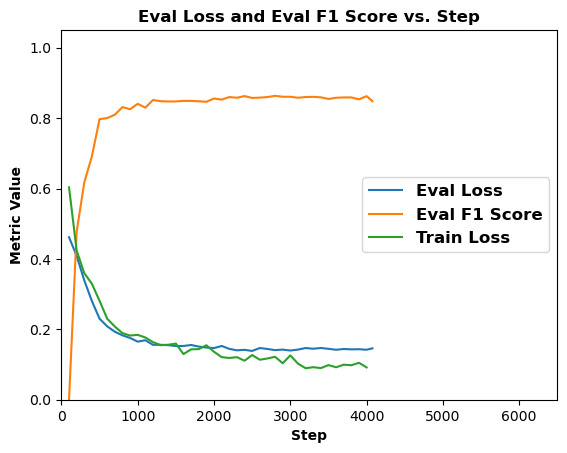

In [29]:
import matplotlib.pyplot as plt

# extract the eval_loss and step values from the log history
eval_loss = [entry["eval_loss"] for entry in log_history if "eval_loss" in entry]
step = [entry["step"] for entry in log_history if "step" and "eval_loss" in entry]
eval_recall = [entry["eval_f1"] for entry in log_history if "eval_f1" in entry]

train_step = [entry["step"] for entry in log_history if "loss" in entry]
train_loss = [entry["loss"] for entry in log_history if "loss" in entry]

# plot the eval_loss vs. step curve
plt.plot(step, eval_loss, label="Eval Loss")
plt.plot(step, eval_recall, label="Eval F1 Score")
plt.plot(train_step, train_loss, label="Train Loss")
plt.ylim(0, 1.05)
plt.xlim(0, 4500)
legend_properties = {"size": 12, "weight": "bold"}
plt.xlabel("Step", weight="bold")
plt.ylabel("Metric Value", weight="bold")
plt.title("Eval Loss and Eval F1 Score vs. Step", weight="bold")
plt.legend(prop=legend_properties)
plt.show()

In [30]:
fig = plt.gcf()
fig.savefig("plot.png", dpi=800)

<Figure size 640x480 with 0 Axes>

In [31]:
model.to("cuda")

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [32]:
pipe = pipeline(task="text-classification", model=model, tokenizer=tokenizer, return_all_scores=True, max_length=512, device=0)
predictions = []
for row in test_data:
    output = pipe(row["text"])
    pred = [1.0 if label['score'] > 0.5 else 0.0 for label in output[0]]
    predictions.append(pred)

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to

In [33]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true_list = [[int(num) for num in row] for row in test_data["labels"]]
y_pred_list = [[int(num) for num in row] for row in predictions]

y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)

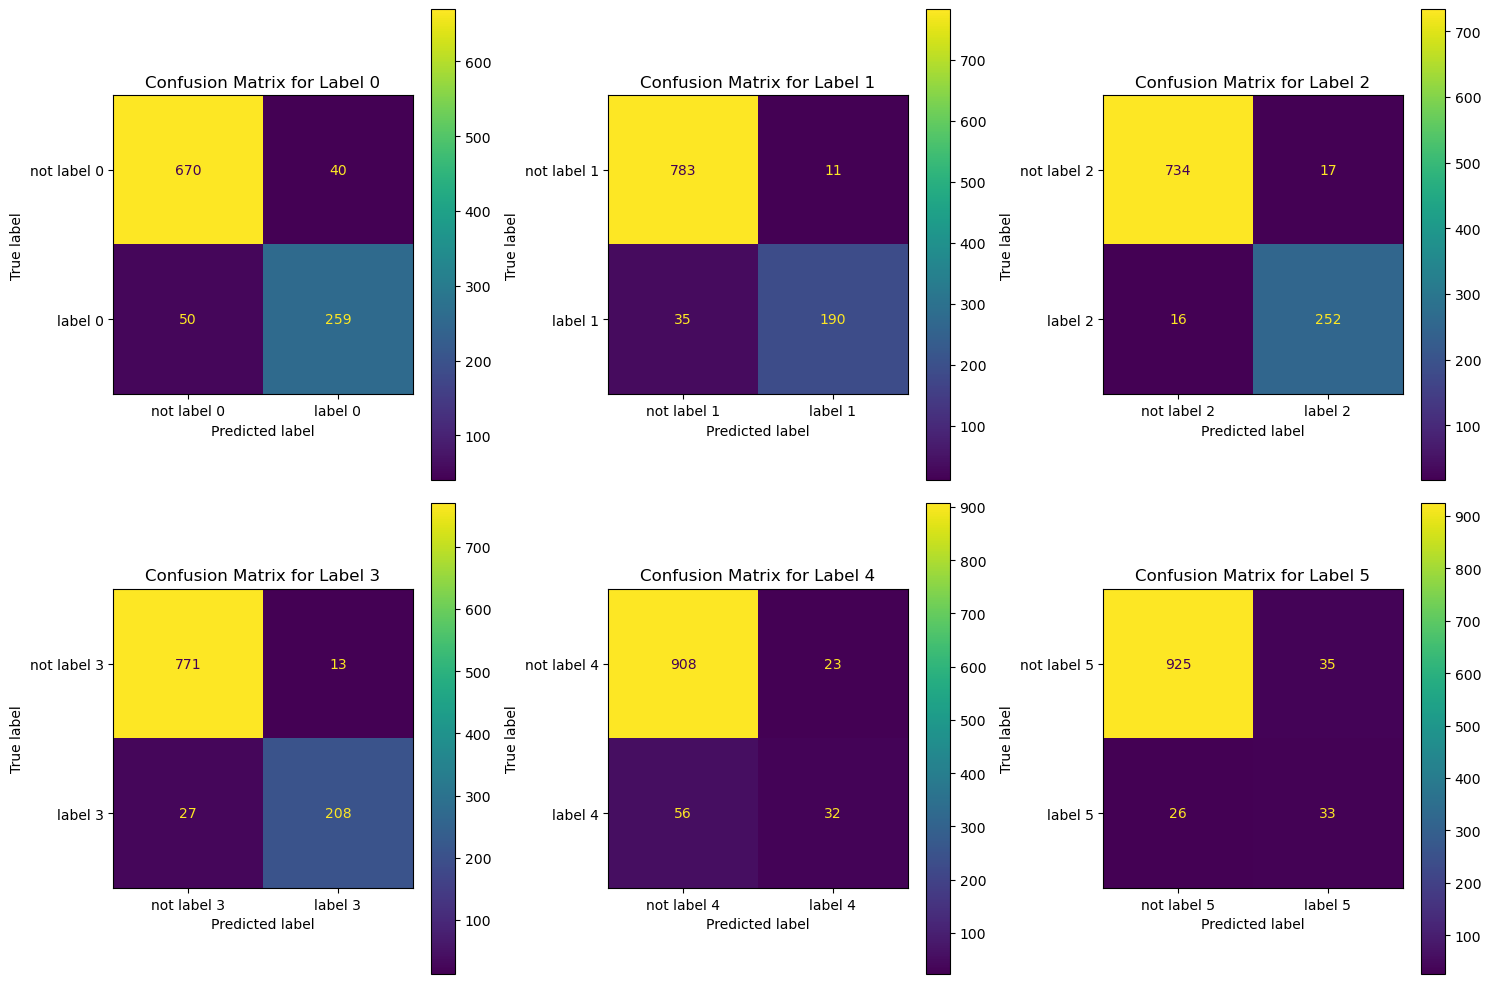

In [34]:
from sklearn.metrics import multilabel_confusion_matrix
multi_cm = multilabel_confusion_matrix(y_true, y_pred)

num_labels = len(multi_cm)
ncols = 3
nrows = (num_labels + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

axes = axes.flatten()

for idx, (cm, ax) in enumerate(zip(multi_cm, axes)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"not label {idx}", f"label {idx}"])
    disp.plot(ax=ax)  # Plot on the specific subplot axis
    ax.set_title(f"Confusion Matrix for Label {idx}")

for i in range(num_labels, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred,target_names=label_columns))

              precision    recall  f1-score   support

    academic       0.87      0.84      0.85       309
       death       0.95      0.84      0.89       225
      mental       0.94      0.94      0.94       268
      family       0.94      0.89      0.91       235
      second       0.58      0.36      0.45        88
       other       0.49      0.56      0.52        59

   micro avg       0.88      0.82      0.85      1184
   macro avg       0.79      0.74      0.76      1184
weighted avg       0.87      0.82      0.84      1184
 samples avg       0.59      0.56      0.57      1184



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
